In [5]:
from functions import *

In [9]:
import matplotlib.pyplot as plt
import glob
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import geopandas as gpd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import glob
import time
from datetime import datetime
from collections import Counter
from PIL import Image

# Visualize one experiment

In [17]:
model='baseline_CNN'
exp = 1

#### Experiment details

In [33]:
df=pd.read_excel(f'../official_results/{model}_results.xlsx')
df
#res[res.Experiment == exp]

,Experiment,RMSE,Variables,Input,Split,Split_id,Optimizer,nº samples,Batch size,Epochs,Date,Time,Duration,Loss,Resolution
0,1,5.872445,lst,74 cells,stratified,1,Adam,1487,32,48 of 300,2024-11-19,15:11:40,218.61,Physics-guided,64
1,2,6.003038,lst,74 cells,stratified,1,Adam,1487,32,71 of 300,2024-11-19,15:16:48,305.95,RMSE,64
2,2,5.532910,lst,74 cells,stratified,1,Adam,1487,64,64 of 300,2024-11-19,15:19:51,181.27,Physics-guided,64
3,3,5.046652,lst,74 cells,stratified,1,Adam,1487,64,75 of 300,2024-11-19,15:23:18,204.64,RMSE,64
4,3,4.988382,lst,74 cells,stratified,1,Adam,1487,128,133 of 300,2024-11-19,15:27:52,272.54,Physics-guided,64
5,4,5.233390,lst,74 cells,stratified,2,Adam,1487,32,58 of 300,2024-11-19,15:29:55,287.89,Physics-guided,64
6,4,4.775533,lst,74 cells,stratified,1,Adam,1487,128,111 of 300,2024-11-19,15:31:48,233.60,RMSE,64
7,5,5.175078,lst,74 cells,stratified,2,Adam,1487,32,54 of 300,2024-11-19,15:34:07,250.21,RMSE,64
8,4,5.530200,lst,74 cells,stratified,3,Adam,1487,32,104 of 300,2024-11-19,15:34:22,494.73,Physics-guided,64
9,5,5.474342,lst,74 cells,stratified,3,Adam,1487,32,46 of 300,2024-11-19,15:37:45,200.47,RMSE,64


In [20]:
errors_df = pd.read_csv(f'../official_results/error_logs/{model}_exp_{exp}.csv')

#### Learning curve

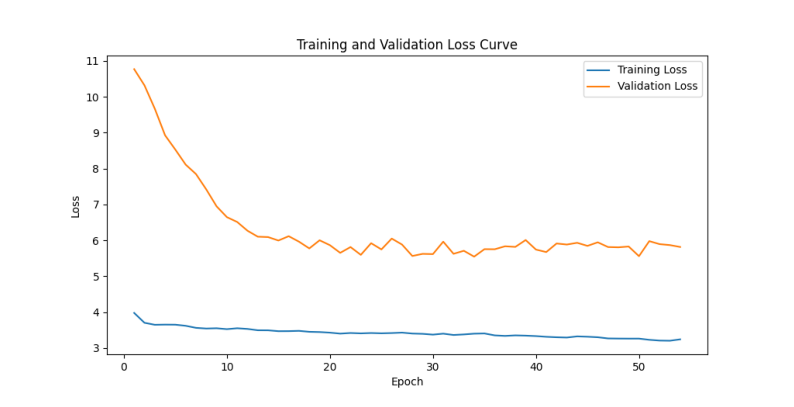

In [22]:
image_path = f'../official_results/learning_curves/{model}_exp_{exp}.png'
image = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


#### Error log

In [23]:
errors_df_filt = errors_df[errors_df['epoch'] <= 100]

In [24]:
errors_df_filt

,epoch,month,error
0,1,10,10.530363
1,1,11,8.949329
2,1,11,8.084322
3,1,9,14.229514
4,1,9,10.514869
...,...,...,...
48163,54,11,2.217951
48164,54,11,1.066507
48165,54,10,4.992143
48166,54,11,4.383929


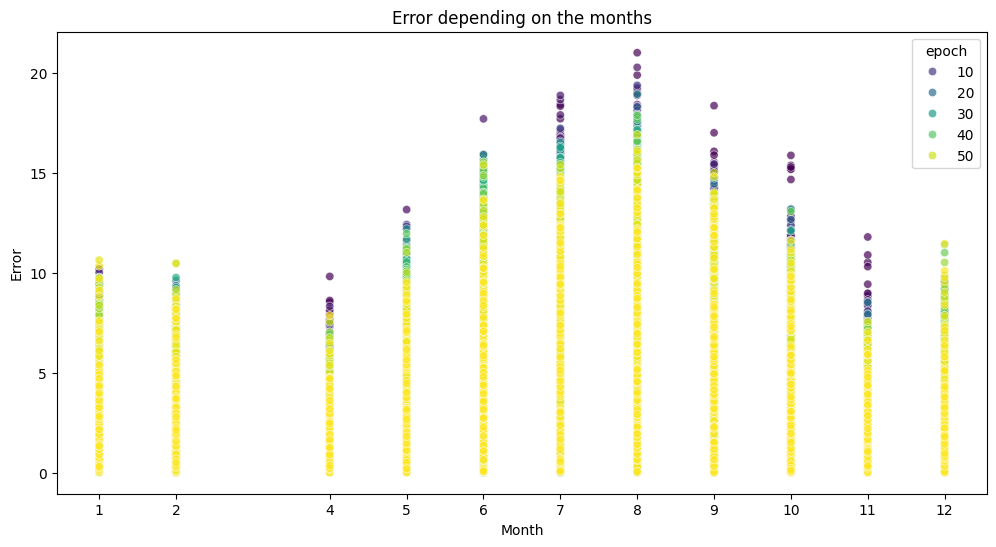

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=errors_df_filt, x="month", y="error", hue="epoch", palette="viridis", alpha=0.7)
plt.xticks(ticks=sorted(errors_df_filt["month"].unique()))
plt.title("Error depending on the months")
plt.xlabel("Month")
plt.ylabel('Error')
plt.show()

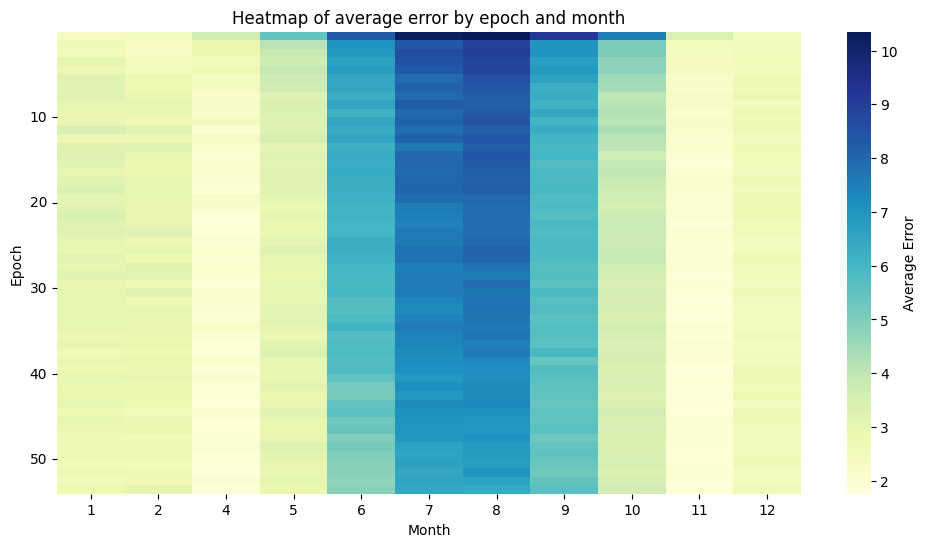

In [26]:
epochs = len(errors_df_filt.epoch.unique())
pivot_table = errors_df_filt.pivot_table(values="error", index="epoch", columns="month", aggfunc="mean")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", cbar_kws={'label': 'Average Error'})
if epochs == 10:
    ticks = range(epochs + 1)
    labelss = [str(i) for i in range(epochs + 1)]
else:
    ticks = [i for i in range(10, epochs + 1, 10)]
    labelss = [str(i) for i in range(10, epochs + 1, 10)]
plt.yticks(ticks=ticks,labels=labelss)
plt.title("Heatmap of average error by epoch and month")
plt.xlabel("Month")
plt.ylabel("Epoch")
plt.show()

In [27]:
frecuencia_por_mes = errors_df['month'].value_counts().sort_index()

print(frecuencia_por_mes)

month
1     4320
2     3456
4     4212
5     4536
6     4050
7     3996
8     4536
9     3780
10    4266
11    7560
12    3456
Name: count, dtype: int64


# Analyze model experiments

### Compare RMSE for all baseline experiments

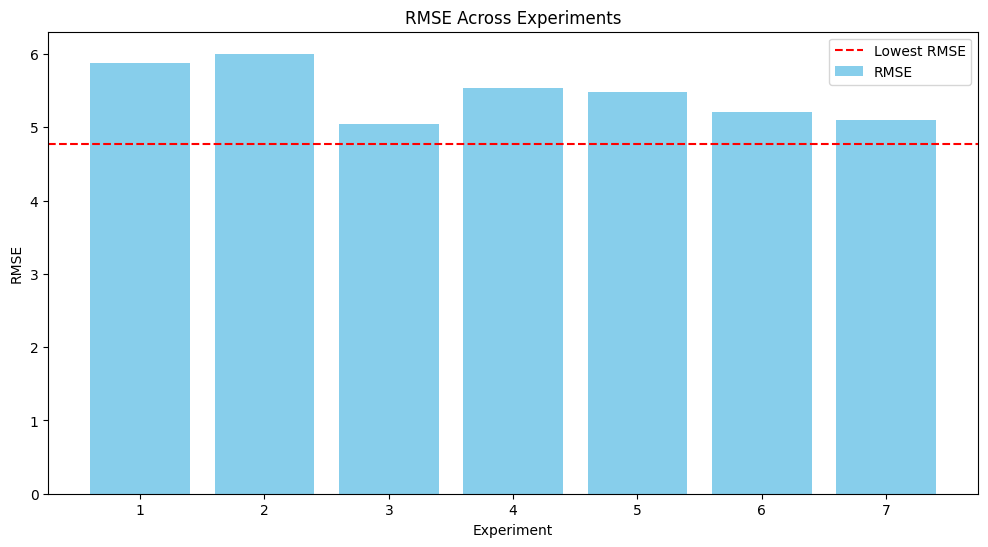

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(df['Experiment'], df['RMSE'], color='skyblue', label="RMSE")
plt.axhline(y=df['RMSE'].min(), color='red', linestyle='--', label="Lowest RMSE")
plt.xlabel('Experiment')
plt.ylabel('RMSE')
plt.title('RMSE Across Experiments')
plt.legend()
plt.show()

### Analyze RMSE by Variable Sets

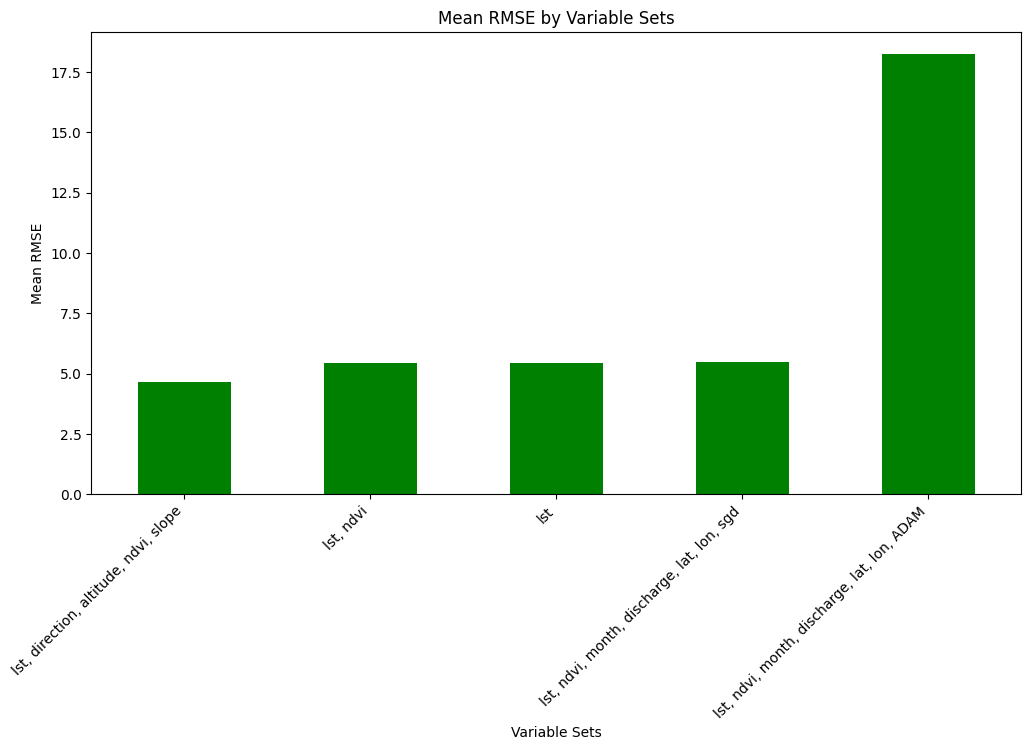

In [25]:
# Group by Variables and calculate mean RMSE
variables_rmse = df.groupby('Variables')['RMSE'].mean().sort_values()

# Plot mean RMSE for each variable set
plt.figure(figsize=(12, 6))
variables_rmse.plot(kind='bar', color='green')
plt.xlabel('Variable Sets')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE by Variable Sets')
plt.xticks(rotation=45, ha='right')
plt.show()


### Analyze RMSE by Batch Size

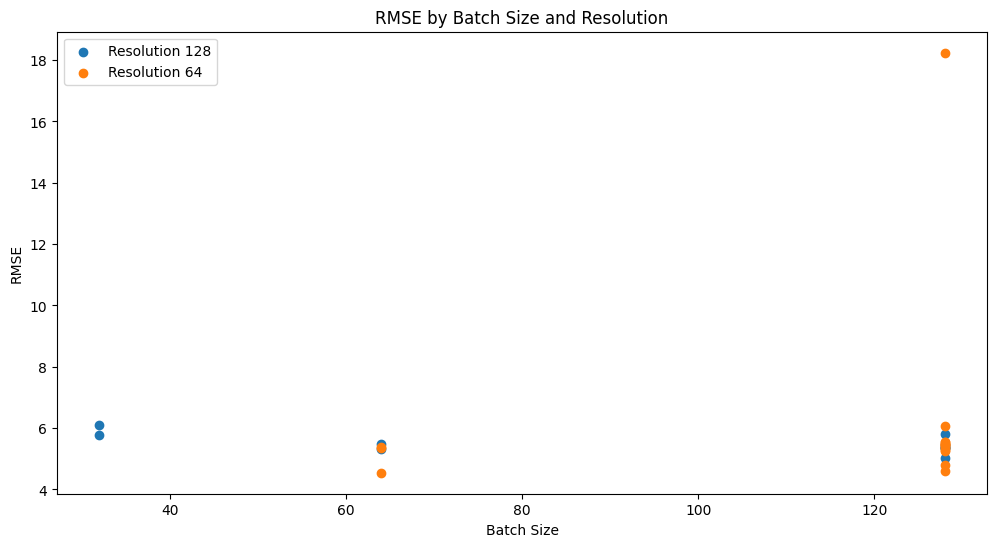

In [26]:
# Plot RMSE by Batch Size
plt.figure(figsize=(12, 6))
for resolution in df['Resolution'].unique():
    subset = df[df['Resolution'] == resolution]
    plt.scatter(subset['Batch size'], subset['RMSE'], label=f"Resolution {resolution}")
plt.xlabel('Batch Size')
plt.ylabel('RMSE')
plt.title('RMSE by Batch Size and Resolution')
plt.legend()
plt.show()


Best Experiment:
     Experiment      RMSE                              Variables      Input  \
25          25  4.545609  lst, direction, altitude, ndvi, slope  74 rivers   

     Split  nº samples  Batch size  Epochs        Date      Time  Duration  \
25  random        1487          64     300  2024-11-18  15:44:15   1095.03   

    Loss  Resolution  
25  RMSE          64  


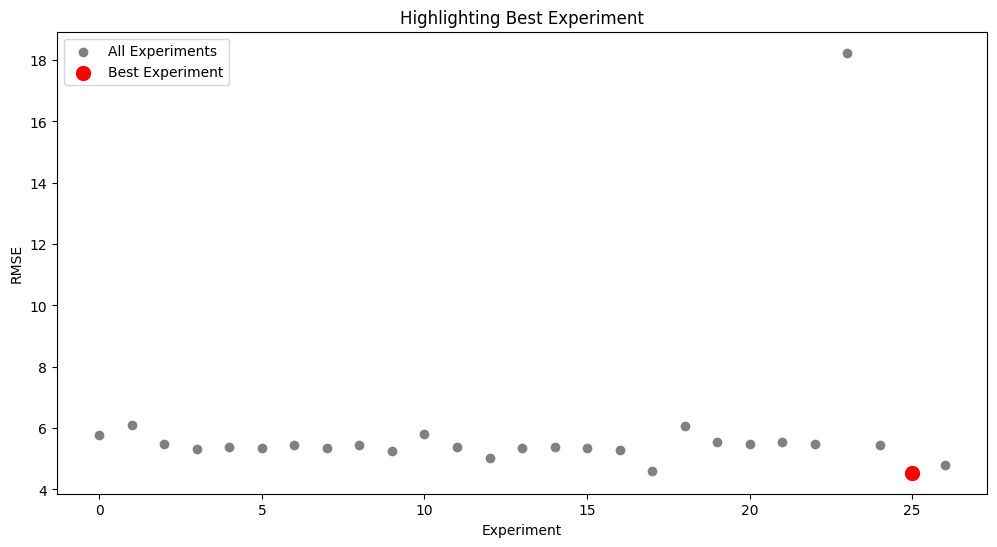

In [28]:
# Find the best experiment (lowest RMSE)
best_experiment = df[df['RMSE'] == df['RMSE'].min()]
print("Best Experiment:\n", best_experiment)

# Optional: Highlight best configurations
plt.figure(figsize=(12, 6))
plt.scatter(df['Experiment'], df['RMSE'], color='grey', label='All Experiments')
plt.scatter(best_experiment['Experiment'], best_experiment['RMSE'], color='red', label='Best Experiment', s=100)
plt.xlabel('Experiment')
plt.ylabel('RMSE')
plt.title('Highlighting Best Experiment')
plt.legend()
plt.show()
